Sentiment Analysis in Python
This notebook is part of my portfolio please check it out! (I scraped data from happycow website to get restautant reviews and then use ML)

In this notebook I will be doing some sentiment analysis in python using two different techniques:

VADER (Valence Aware Dictionary and Sentiment Reasoner) -"Bag of words approach"
Roberta Pretrained Model from 
Huggingface Pipeline

using same restaurant location I will then compare review sites Happycow Vs Yelp reviews. ( in anther notebook) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime as dt
from bs4 import BeautifulSoup

plt.style.use('ggplot')

import nltk
# required for tokenization
nltk.download('punkt')
# required for parts of speech tagging
nltk.download('averaged_perceptron_tagger')
nltk.download('popular')
from nltk import ne_chunk
from nltk import pos_tag 
from nltk import RegexpParser

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/davidpegoli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/davidpegoli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/davidpegoli/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/davidpegoli/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/davidpegoli/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/davidpegoli/nltk_data...
[nltk_data

I pulled in CSV with parse_date to read in with a Datetime64..

In [27]:
df = pd.read_csv('/Users/davidpegoli/Desktop/happycow_dz_baltimore.csv',parse_dates=['Date'])

df

,Date,Stars,Review
0,2023-03-09,5,Double Zero is a #Win_Win!! I loved this atmo...
1,2023-02-23,5,I went here with a non-vegan and we both loved...
2,2023-02-13,5,Can’t say enough great things about this place...
3,2023-01-16,3,We waited in the restaurant for our carryout p...
4,2023-01-12,4,I paid for parking nearby ($25). This spot is ...
5,2022-12-12,5,"Every dish was super, including both desserts...."
6,2022-11-06,5,Overall an excellent experience. A minor glitc...
7,2022-11-05,5,Great experience at Double Zero today. Pizzas ...
8,2022-09-26,5,I’m literally blown away by how good this food...
9,2022-09-18,5,Shout out to Isaak our waiter and the first wa...


I checked dtypes..

In [28]:
df.dtypes

Date      datetime64[ns]
Stars              int64
Review            object
dtype: object

Quick EDA (Exploratory Data Analysis)

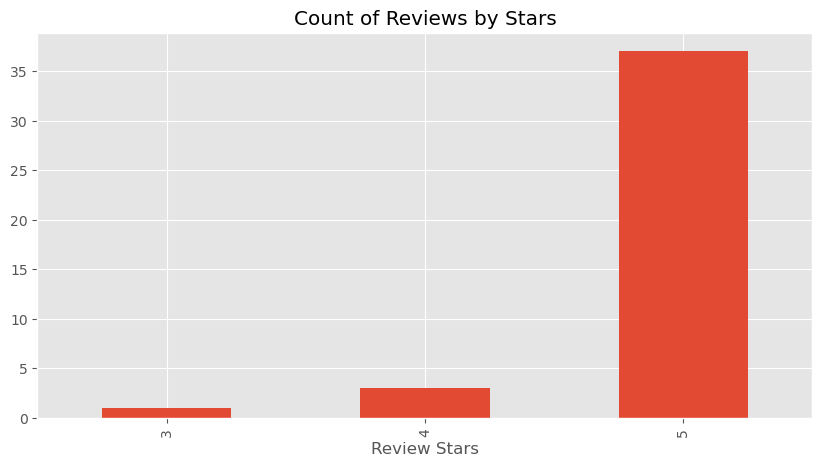

In [37]:
ax = df["Stars"].value_counts().sort_index() \
.plot(kind='bar',
     title='Count of Reviews by Stars',
     figsize=(10,5))
ax.set_xlabel('Review Stars')  
plt.show()   

Basic NLTK 

Step 1. VADER Senimantal Scoring 
I use NLTK's SentimentalIntensityAnalyzer to get neg/neu/pos score

In [39]:
# taken review line from data as a example 
example = df["Review"][20]
print(example)

This was the best pizza ever. The pepperoni had a little kick and reminded me so much of real pepperoni. I loved the Caesar salad, so flavorful!


In [40]:
# will split the sentice in each word "space" to tokenize

nltk.word_tokenize(example)

['This',
 'was',
 'the',
 'best',
 'pizza',
 'ever',
 '.',
 'The',
 'pepperoni',
 'had',
 'a',
 'little',
 'kick',
 'and',
 'reminded',
 'me',
 'so',
 'much',
 'of',
 'real',
 'pepperoni',
 '.',
 'I',
 'loved',
 'the',
 'Caesar',
 'salad',
 ',',
 'so',
 'flavorful',
 '!']

In [41]:
# after tokenizing for natural language processing often need to convert the text into some format that the computer can interpid 

tokens = nltk.word_tokenize(example)
tokens[:10]


['This', 'was', 'the', 'best', 'pizza', 'ever', '.', 'The', 'pepperoni', 'had']

# convert to token below part of speech tag with codes link to check out the meanings.   
https://www.guru99.com/pos-tagging-chunking-nltk.html

In [43]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('pizza', 'NN'),
 ('ever', 'RB'),
 ('.', '.'),
 ('The', 'DT'),
 ('pepperoni', 'NN'),
 ('had', 'VBD')]

In [44]:
## putting the tags into entities

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

# to chunk tokens and group them into chunks. best to use prettyprint pprint. 


(S
  This/DT
  was/VBD
  the/DT
  best/JJS
  pizza/NN
  ever/RB
  ./.
  The/DT
  pepperoni/NN
  had/VBD
  a/DT
  little/JJ
  kick/NN
  and/CC
  reminded/VBD
  me/PRP
  so/RB
  much/RB
  of/IN
  real/JJ
  pepperoni/NN
  ./.
  I/PRP
  loved/VBD
  the/DT
  (GPE Caesar/NNP)
  salad/NN
  ,/,
  so/RB
  flavorful/JJ
  !/.)


this approach basically takes all the words in a sentice and has a value of postive, negative or nuetral for each word.. then it combines up a math equation adding up all the words to put how positive, negative, or neutral the statement is off all the words.  Does not account for relationship between words. ( we know it is very inpiortant in human speeach 
but this a good approach to grab more of a better reading)

Step 1. VADER Seniment Scoring
I will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

In [45]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

Run the key words to text see if scoring is accurate 

In [46]:
#postive 
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [47]:
#negative 
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [48]:
#run score the token expample from above 
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.8553}

In [95]:
# tqdm is a library that is used for creating Python Progress Bars

from tqdm import tqdm

In [96]:
# Run the polarity score on the entire dataset...a way to store the results created a res for dictionary. everytime a loop through, store in myid part of the dictioary polarity score. 
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text= row['Review']
    myid = row['Stars']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 41/41 [00:00<00:00, 2042.87it/s]


In [100]:
#runnning the polarity score table 

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Stars'})
vaders = vaders.merge(df, how='left')
vaders

,Stars,neg,neu,pos,compound,Date,Review
0,5,0.018,0.857,0.125,0.8860,2023-03-09,Double Zero is a #Win_Win!! I loved this atmo...
1,5,0.018,0.857,0.125,0.8860,2023-02-23,I went here with a non-vegan and we both loved...
2,5,0.018,0.857,0.125,0.8860,2023-02-13,Can’t say enough great things about this place...
3,5,0.018,0.857,0.125,0.8860,2022-12-12,"Every dish was super, including both desserts...."
4,5,0.018,0.857,0.125,0.8860,2022-11-06,Overall an excellent experience. A minor glitc...
5,5,0.018,0.857,0.125,0.8860,2022-11-05,Great experience at Double Zero today. Pizzas ...
6,5,0.018,0.857,0.125,0.8860,2022-09-26,I’m literally blown away by how good this food...
7,5,0.018,0.857,0.125,0.8860,2022-09-18,Shout out to Isaak our waiter and the first wa...
8,5,0.018,0.857,0.125,0.8860,2022-09-14,I’ve happily been to their other location in P...
9,5,0.018,0.857,0.125,0.8860,2022-09-12,"We were thrilled with the delicious options, i..."


Ploting the data. in the more simple way of the higher star equal to higher compound. 

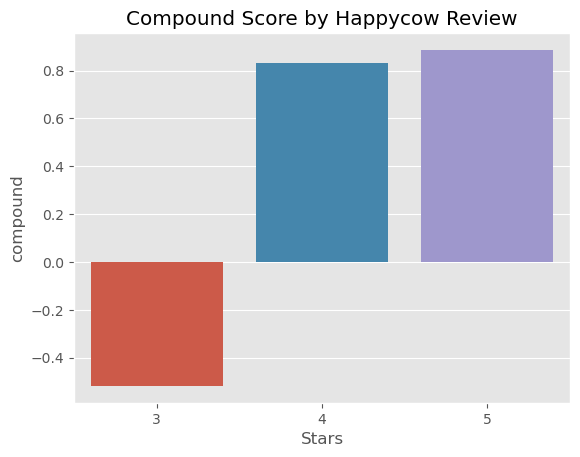

In [101]:
ax = sns.barplot(data=vaders, x='Stars', y='compound')
ax.set_title('Compound Score by Happycow Review')
plt.show()

breakdown deeper look at the pos, neu, and neg score for each..


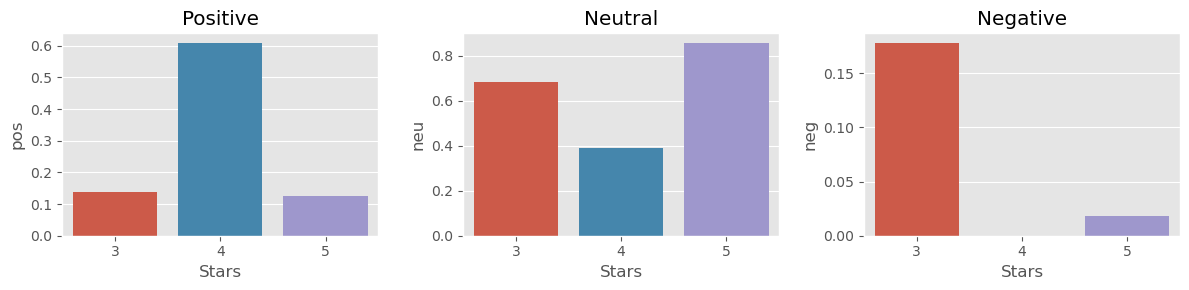

In [102]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Stars', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Over all I see that Vaders is confrim and valuable with connection to Score of reviews and sentiment score but Roberta can be more powerful
Vaders just looks at each word
Roberta tranformer deep learning can pick up on context related words..   

Roberta Pretrained Model from huggingface   
last model will show differnce between model outputs from the two packages and compared results...


Step 3. Roberta Pretrained Model
Use a model trained of a large corpus of data.
Transformer model accounts for the words but also the context related to other words.


In [105]:


from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [107]:
#### provided from twitter and trained on twitter comments so no need to retrain just apply and use trained weight to apply and see results


MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [108]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This was the best pizza ever. The pepperoni had a little kick and reminded me so much of real pepperoni. I loved the Caesar salad, so flavorful!


{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.8553}

In [109]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0014433512, 'roberta_neu': 0.0067647737, 'roberta_pos': 0.99179184}


In [110]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [113]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['Stars']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

100%|██████████| 41/41 [00:55<00:00,  1.34s/it]


In [125]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Stars'})
results_df = results_df.merge(df, how='left')

Compare Scores between models

In [126]:
results_df.columns

Index(['Stars', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Date', 'Review'],
      dtype='object')

Step 3. Combine and compare

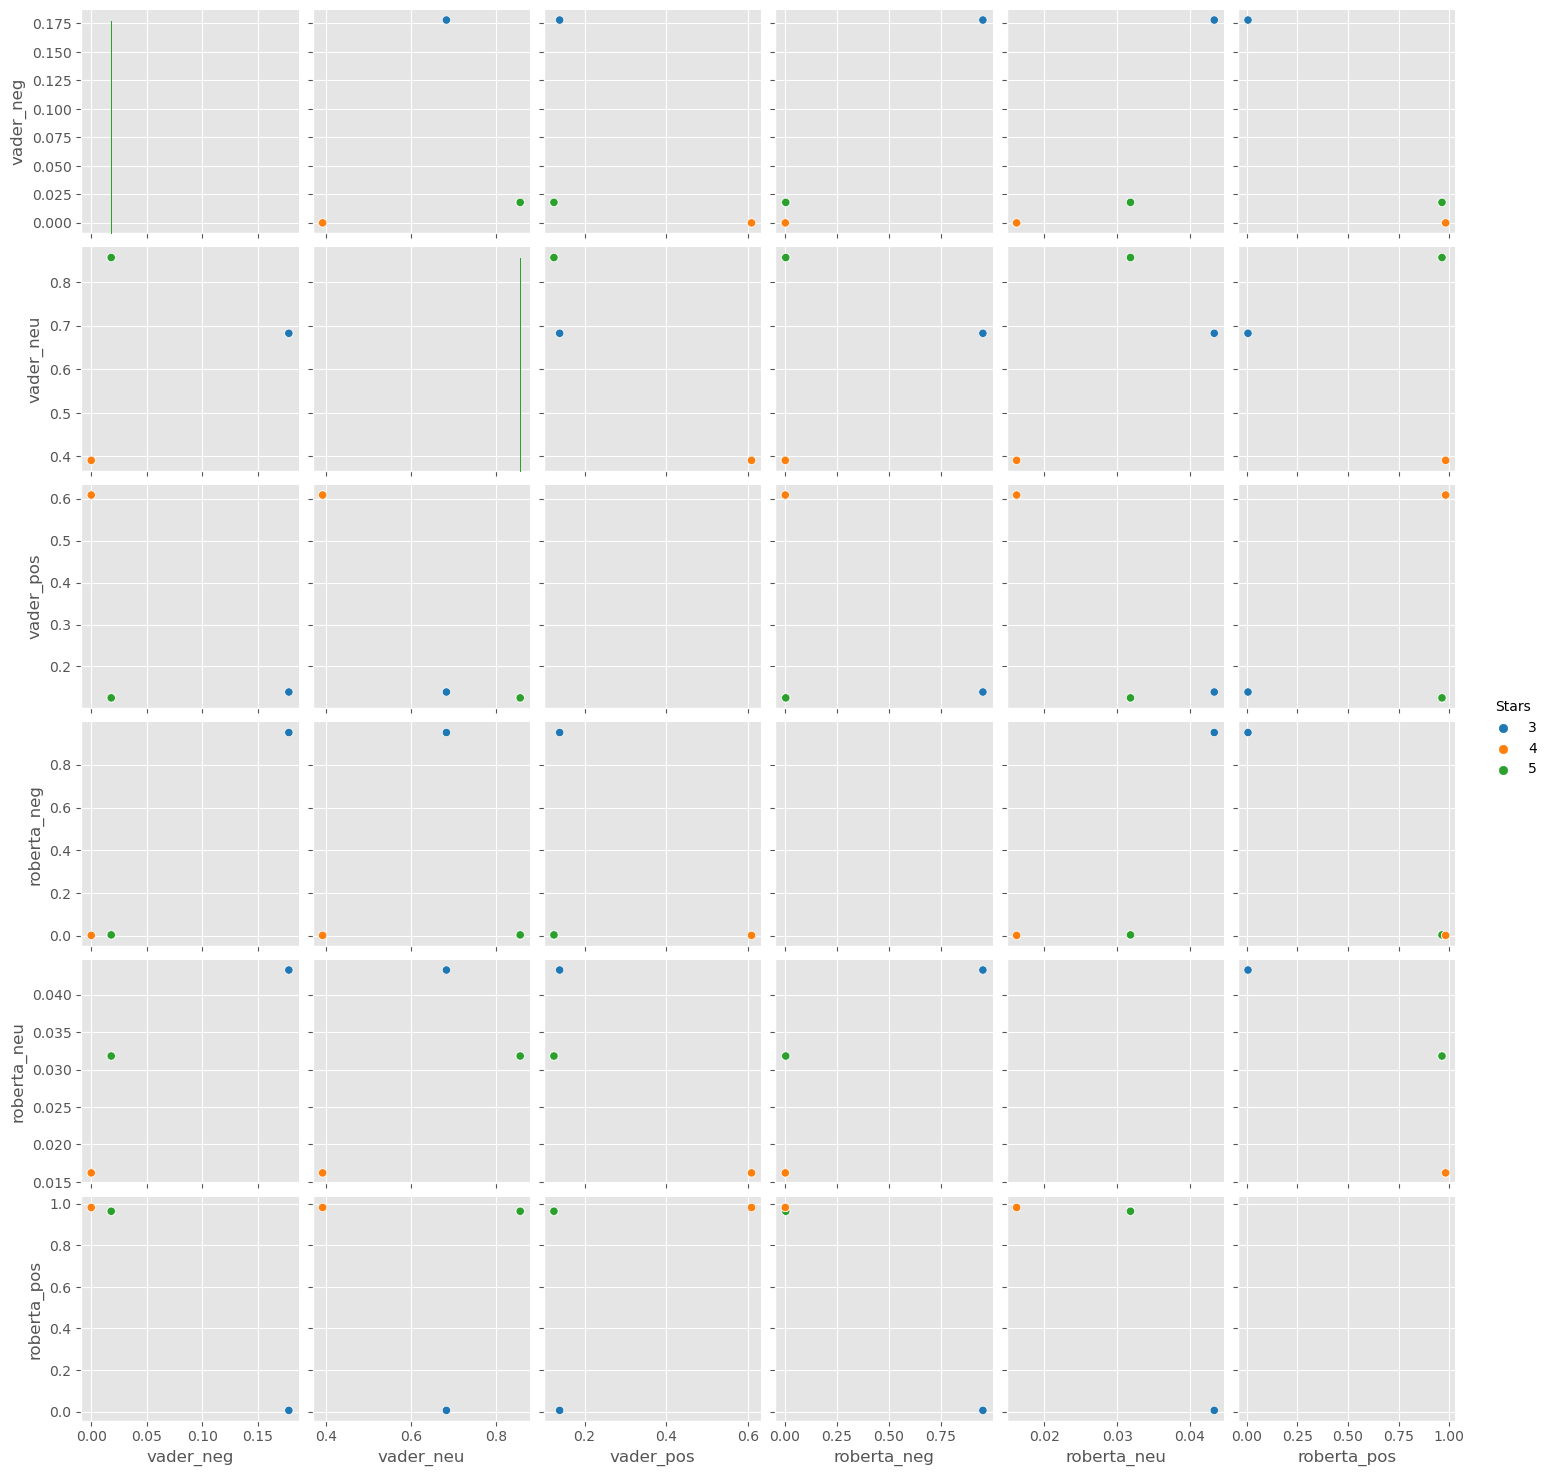

In [127]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Stars',
            palette='tab10')
plt.show()

Step 4: Review Examples:
Positive 1-Star and Negative 5-Star Reviews
Lets look at some examples where the model scoring and review score differ the most.

In [148]:
#Stars = 3 because no 1 star was giving even though lowest rating is 3 stars. roberta and vader results are equal.  but not to much data to really run...


results_df.query('Stars == 3') \
    .sort_values('roberta_pos', ascending=False)['Review'].values[0]

"We waited in the restaurant for our carryout pizza, so it was fresh and hot, but the taste was so bad that we couldn't even finish :("

In [151]:
results_df.query('Stars == 3') \
    .sort_values('vader_pos', ascending=False)['Review'].values[0]

"We waited in the restaurant for our carryout pizza, so it was fresh and hot, but the taste was so bad that we couldn't even finish :("